In [10]:
#SNIPPET 5.1 T-VALUE OF A LINEAR TREND 
import statsmodels.api as sm1
import numpy as np
import pandas as pd
#--------------------------------------------------- 
def tValLinR(close):
    # tValue of the beta coefficient of the trend on time index from a linear trend (it shows the significance of )
    x=np.ones((close.shape[0],2)) 
    x[:,1]=np.arange(close.shape[0]) 
    ols=sm1.OLS(close,x).fit()
    return ols.tvalues[1]

In [7]:
#SNIPPET 5.2 IMPLEMENTATION OF THE TREND-SCANNING METHOD
def getBinsFromTrend(molecule,close,span):
    '''
    Derive labels from the sign of t-value of linear trend
    Output includes:
        - t1: End time for the identified trend
        - tVal: t-value associated with the estimated trend coefficient 
        - bin: Sign of the trend
    ''' 
    out=pd.DataFrame(index=molecule,columns=['t1','tVal','bin']) 
    hrzns=range(*span)
    for dt0 in molecule:
        df0=pd.Series() 
        iloc0=close.index.get_loc(dt0)
        if iloc0+max(hrzns)>close.shape[0]:continue
        for hrzn in hrzns: 
            dt1=close.index[iloc0+hrzn-1] 
            df1=close.loc[dt0:dt1] 
            df0.loc[dt1]=tValLinR(df1.values)
        dt1=df0.replace([-np.inf,np.inf,np.nan],0).abs().idxmax() 
        out.loc[dt0,['t1','tVal','bin']]=df0.index[-1],df0[dt1],np.sign(df0[dt1]) # prevent leakage
    out['t1']=pd.to_datetime(out['t1']) 
    out['bin']=pd.to_numeric(out['bin'],downcast='signed') 
    return out.dropna(subset=['bin'])

Text(0.5, 1.0, 'Simu without Sine trend')

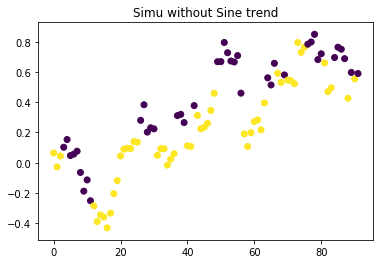

In [25]:
#SNIPPET 5.3 TESTING THE TREND-SCANNING LABELING ALGORITHM
import matplotlib.pyplot as plt
df0=pd.Series(np.random.normal(0,.1,100)).cumsum() 
df1=getBinsFromTrend(df0.index,df0,[3,10,1])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df1.index,df0.loc[df1.index].values,c=df1['bin'].values, cmap='viridis')
ax.set_title('Simu without Sine trend')


Text(0.5, 1.0, 'Simu with Sine trend')

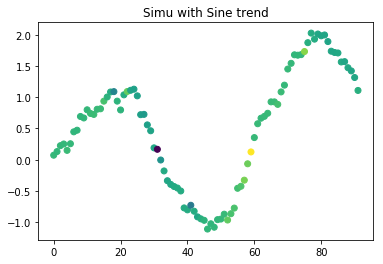

In [27]:
df0=pd.Series(np.random.normal(0,.1,100)).cumsum() 
df0+=np.sin(np.linspace(0,10,df0.shape[0])) 
df1=getBinsFromTrend(df0.index,df0,[3,10,1]) 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df1.index,df0.loc[df1.index].values,c=df1['tVal'].values, cmap='viridis')
ax.set_title('Simu with Sine trend')
# mpl.savefig('fig 5.1.png');
# mpl.clf();
# mpl.close() 
#mpl.scatter(df1.index,df0.loc[df1.index].values,cmap='viridis')